In [2]:
import numpy as np
from skimage.io import imread
from skimage import img_as_float
from sklearn.cluster import KMeans
from skimage.metrics import peak_signal_noise_ratio
import pylab
%matplotlib inline

height = 789 , width = 1102


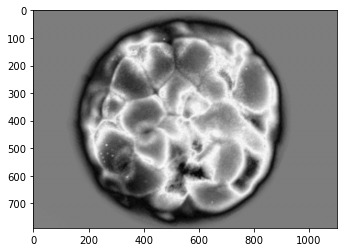

In [34]:
image = imread('green_dom.png')
image = img_as_float(image)
height, width, _ = image.shape
print("height =", height, ", width =", width)
pylab.imshow(image)

In [35]:
X = []
for row in image:
    for px in row:
        X.append(px)
        
X = np.array(X)

for n_clusters in range(3,10):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=241)
    kmeans.fit(X)
    labels = kmeans.labels_
    
    cardinality = {i : 0 for i in range(n_clusters)}
    color_of_cluster_avg = {i: np.array([0.,0.,0.,0.]) for i in range(n_clusters)}
    color_of_cluster_median = {i: [] for i in range(n_clusters)}
    
    for i in range(len(X)):
        color_of_cluster_median[labels[i]].append(X[i])
        color_of_cluster_avg[labels[i]] += X[i]
        cardinality[labels[i]] += 1
    
    for i in range(n_clusters):
        color_of_cluster_median[i] = np.median(color_of_cluster_median[i], axis=0)
        color_of_cluster_avg[i] = color_of_cluster_avg[i]/cardinality[i]
    
    new_X_avg = [color_of_cluster_avg[labels[i]] for i in range(len(X))]
    new_X_median = [color_of_cluster_median[labels[i]] for i in range(len(X))]
    new_image_avg = [[] for i in range(height)]
    new_image_median = [[] for i in range(height)]
    for i in range(len(X)):
        new_image_avg[int(i/width)].append(new_X_avg[i])
        new_image_median[int(i/width)].append(new_X_median[i])
    new_image_avg = np.array(new_image_avg)
    new_image_median = np.array(new_image_median)
    
    print("clusters =", n_clusters)
    print("average color:", peak_signal_noise_ratio(image, new_image_avg))
    print("median color:", peak_signal_noise_ratio(image, new_image_median))
    
    pylab.imsave('%d_clustered_green_dom.png' % n_clusters, new_image_avg)

clusters = 3
average color: 24.44194307579421
median color: 24.421134495659693
clusters = 4
average color: 26.459245719025517
median color: 26.341493176938894
clusters = 5
average color: 28.93723320155388
median color: 28.91890426161265
clusters = 6
average color: 30.31506424660076
median color: 30.2702090699791
clusters = 7
average color: 31.87410807198599
median color: 31.8504875042575
clusters = 8
average color: 32.92833013840415
median color: 32.88049308627226
clusters = 9
average color: 34.12537102406607
median color: 34.11265914451543


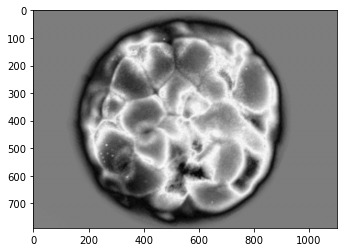

In [36]:
pylab.imshow(image)

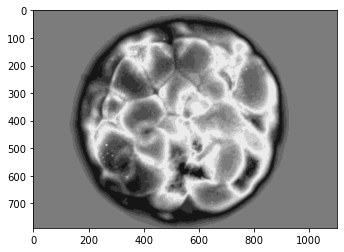

In [37]:
pylab.imshow(new_image_avg)
#pylab.imsave('8_clustered_10sec_og.png', new_image_avg)

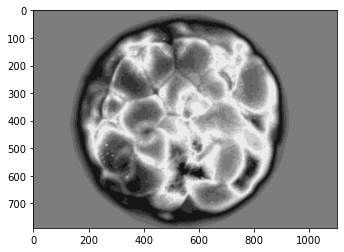

In [38]:
pylab.imshow(new_image_median)